In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Deepika\Desktop\netflix_titlesssss.csv", encoding="iso-8859-1")

# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Handle missing values
df = df.dropna(subset=['title', 'type'])
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna(pd.Timestamp('1970-01-01'))

# Convert data types
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['duration'] = df['duration'].str.replace(' min', '').str.replace(' Seasons', '').str.replace(' Season', '')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce').fillna(0)

# Remove duplicates
df = df.drop_duplicates()

# Handle inconsistent data
df = df[df['type'].isin(['Movie', 'TV Show'])]

# Display the cleaned data summary
print("Cleaned Data Information:")
print(df.info())

# Adding year column
df['year_added'] = df['date_added'].dt.year


Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8809 non-null   object        
 1   type          8809 non-null   object        
 2   title         8809 non-null   object        
 3   director      8809 non-null   object        
 4   cast          8809 non-null   object        
 5   country       8809 non-null   object        
 6   date_added    8809 non-null   datetime64[ns]
 7   release_year  8809 non-null   int64         
 8   rating        8809 non-null   object        
 9   duration      8809 non-null   float64       
 10  listed_in     8809 non-null   object        
 11  description   8809 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 894.7+ KB
None


Shows added per year:
1970      10
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
2024       2
Name: year_added, dtype: int64


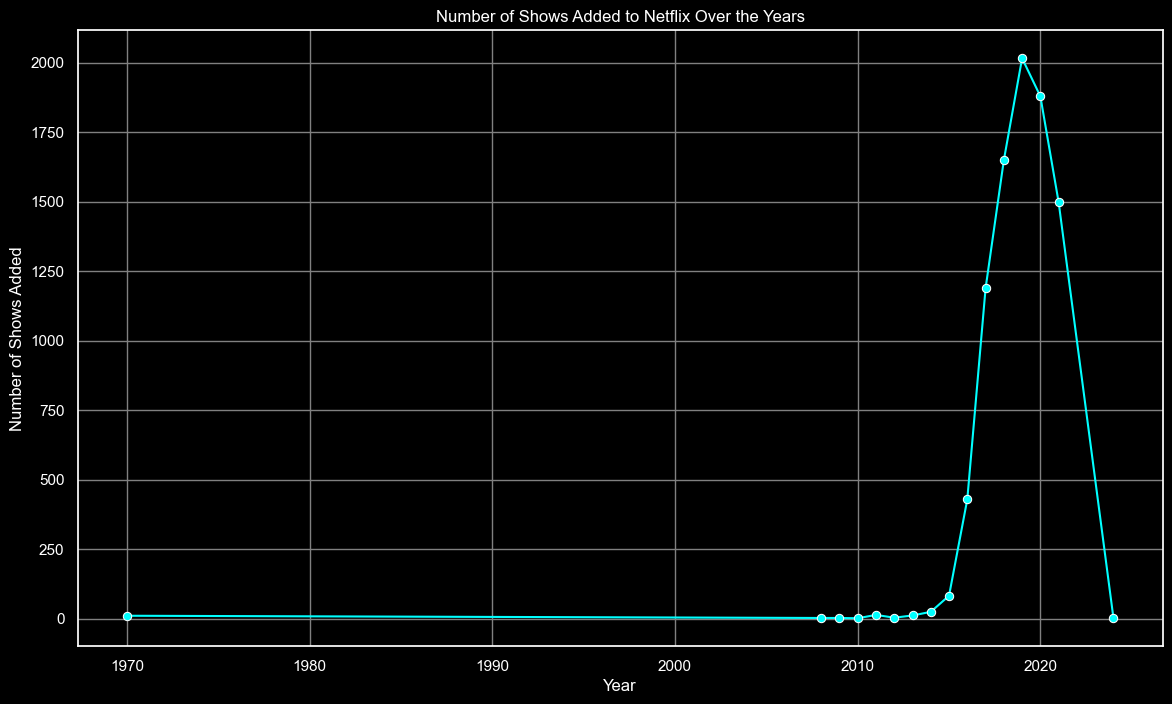

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set(style="whitegrid")

# Customizing the matplotlib settings
plt.style.use('dark_background')

custom_params = {"axes.facecolor": "black",
                 "axes.edgecolor": "white",
                 "axes.labelcolor": "white",
                 "xtick.color": "white",
                 "ytick.color": "white",
                 "grid.color": "gray",
                 "text.color": "white"}

plt.rcParams.update(custom_params)

# Shows added per year
shows_per_year = df['year_added'].value_counts().sort_index()
print("Shows added per year:")
print(shows_per_year)

# Plotting the trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=shows_per_year, marker='o', color='cyan')
plt.title('Number of Shows Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.show()


Distribution of content types:
Movie      6132
TV Show    2677
Name: type, dtype: int64


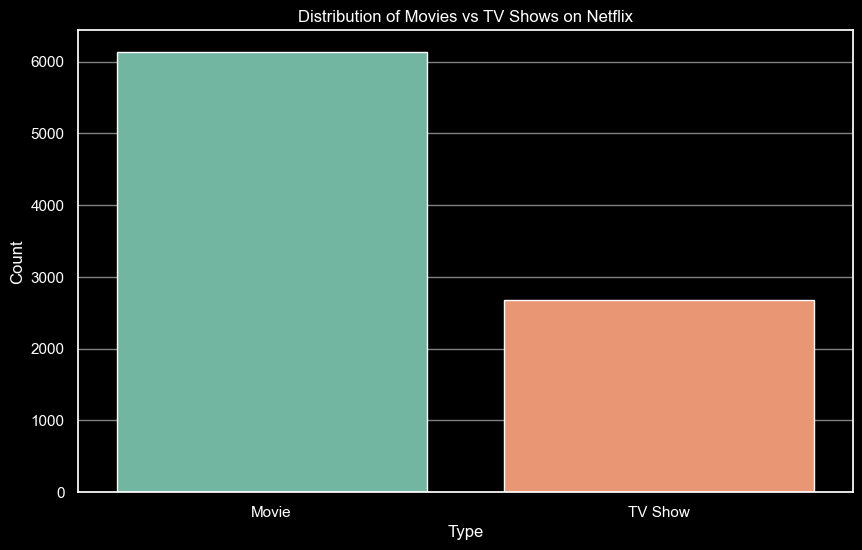

In [3]:
# Distribution of movies vs TV shows on Netflix
type_distribution = df['type'].value_counts()
print("Distribution of content types:")
print(type_distribution)

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


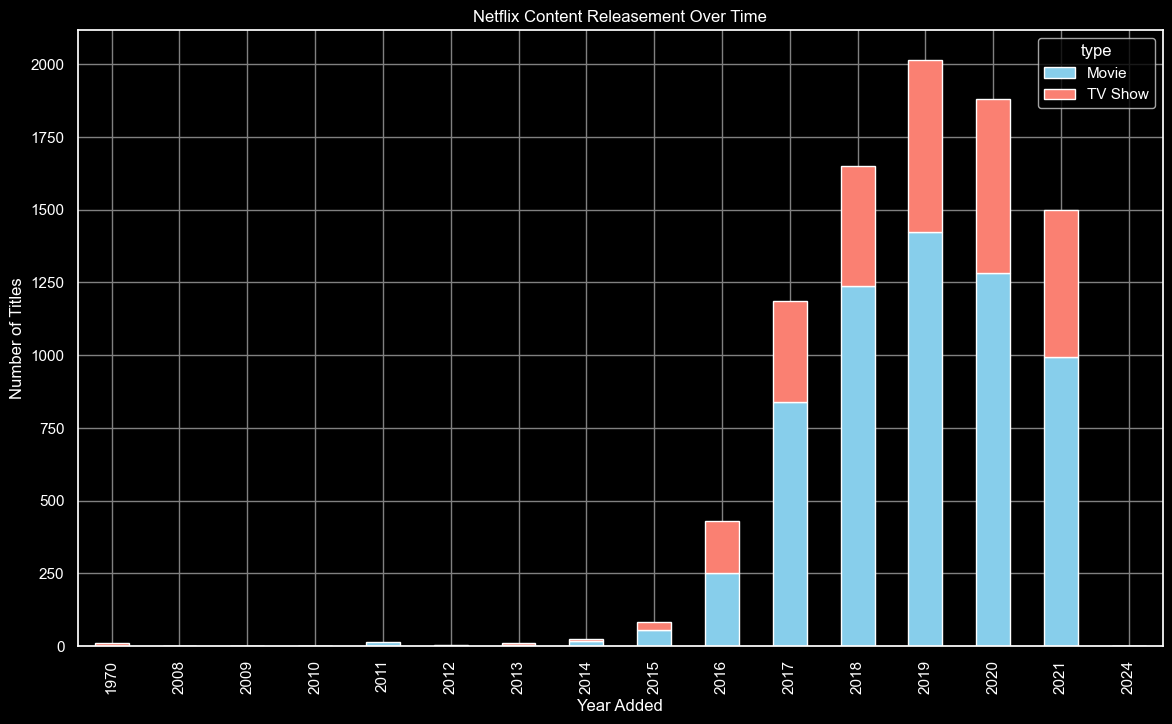

In [4]:
# Number of Movies & TV Shows added over time
content_per_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
content_per_year.plot(kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'salmon'])
plt.title('Netflix Content Releasement Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()


Shows added per month:
1     748
2     563
3     742
4     766
5     632
6     728
7     827
8     755
9     770
10    760
11    705
12    813
Name: month_added, dtype: int64


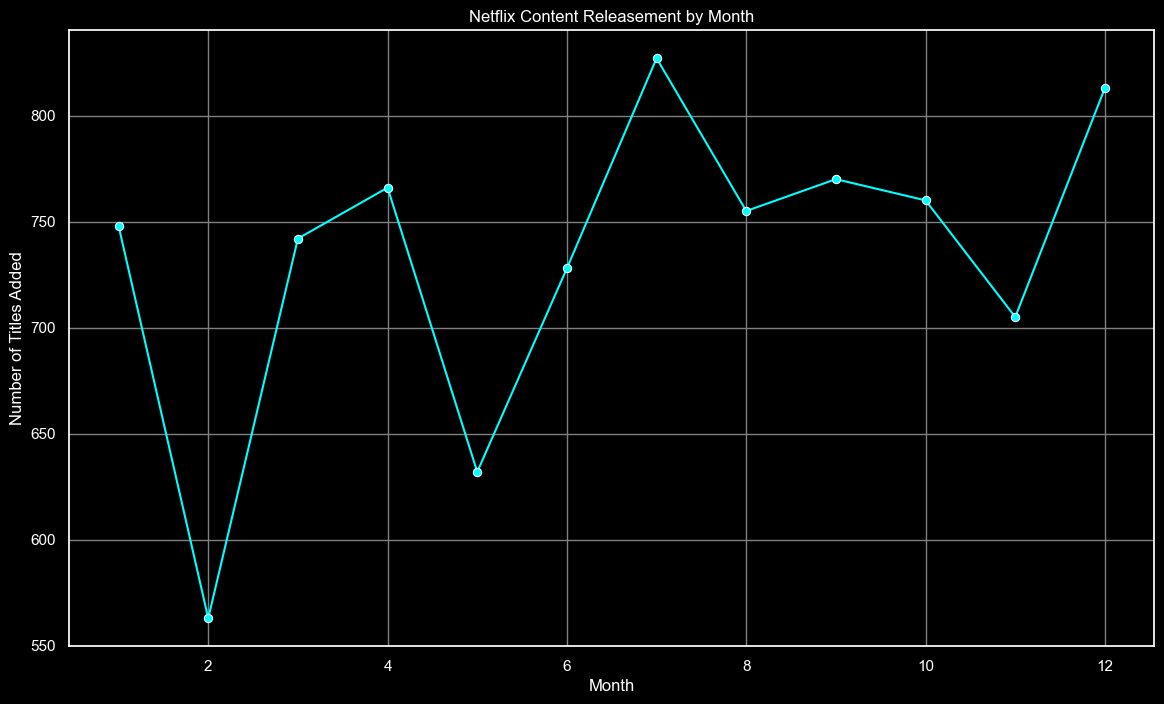

In [5]:
# Extract month from 'date_added'
df['month_added'] = df['date_added'].dt.month

# Shows added per month
monthly_additions = df['month_added'].value_counts().sort_index()
print("Shows added per month:")
print(monthly_additions)

# Plotting the trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_additions, marker='o', color='cyan')
plt.title('Netflix Content Releasement by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.show()


Top 10 content-producing countries:
United States     2819
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        200
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64


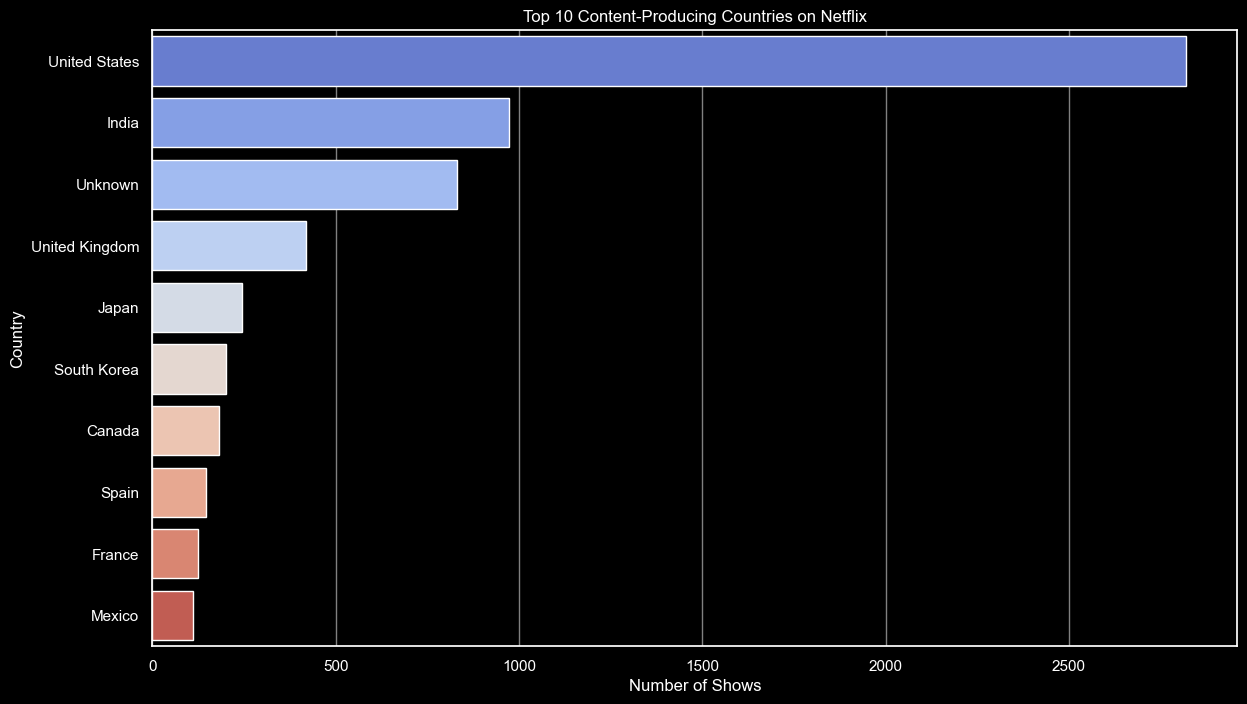

In [6]:
# Top 10 content-producing countries
country_distribution = df['country'].value_counts().head(10)
print("Top 10 content-producing countries:")
print(country_distribution)

# Plotting the top 10 countries
plt.figure(figsize=(14, 8))
sns.barplot(x=country_distribution.values, y=country_distribution.index, palette='coolwarm')
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()


In [7]:
import plotly.express as px

# Interactive map using Plotly
fig = px.choropleth(df, locations='country', locationmode='country names', color='type', hover_name='title', animation_frame='year_added')
fig.update_layout(title_text='Netflix Library by Country Over the Years', title_x=0.5)
fig.show()


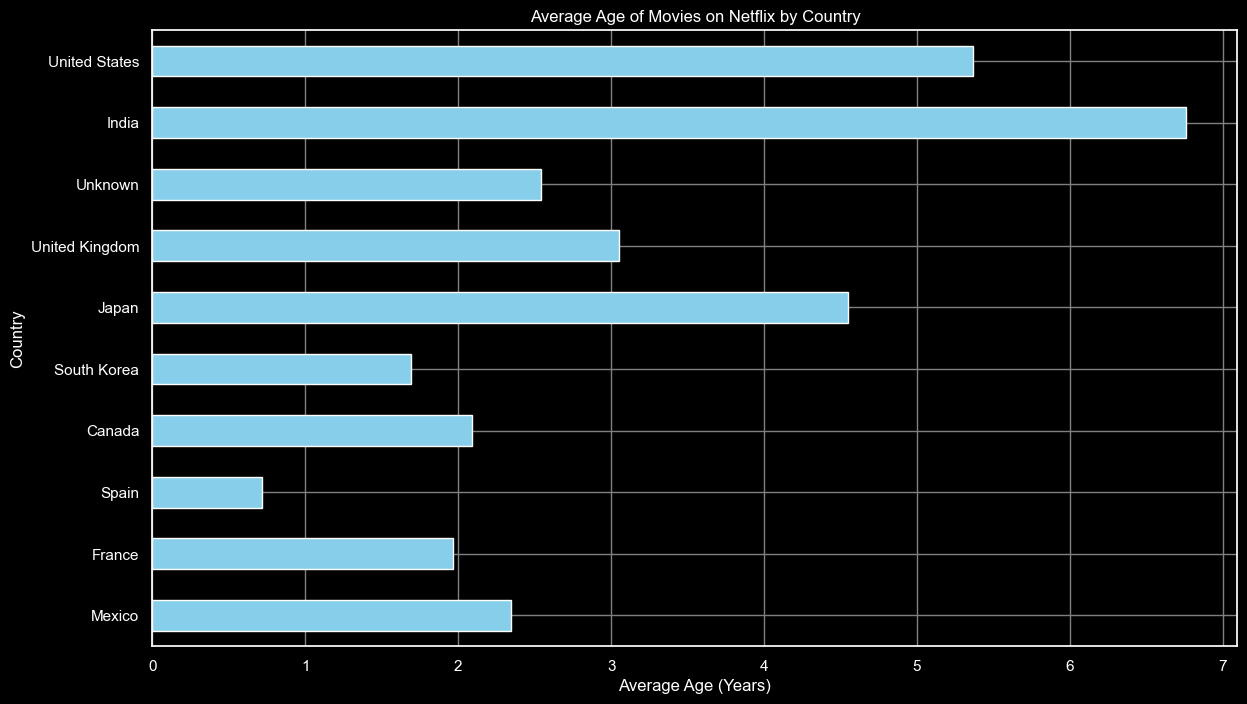

In [8]:
# Calculate the average age of movies by country
df['release_year'] = df['release_year'].astype(int)
df['age'] = df['year_added'] - df['release_year']
average_age_by_country = df.groupby('country')['age'].mean().sort_values(ascending=False)

# Select top 10 countries with the most content for better visualization
top_countries = df['country'].value_counts().head(10).index
average_age_by_top_countries = average_age_by_country[top_countries]

# Plotting average age by country
plt.figure(figsize=(14, 8))
average_age_by_top_countries.plot(kind='barh', color='skyblue')
plt.title('Average Age of Movies on Netflix by Country')
plt.xlabel('Average Age (Years)')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the highest value at the top
plt.show()


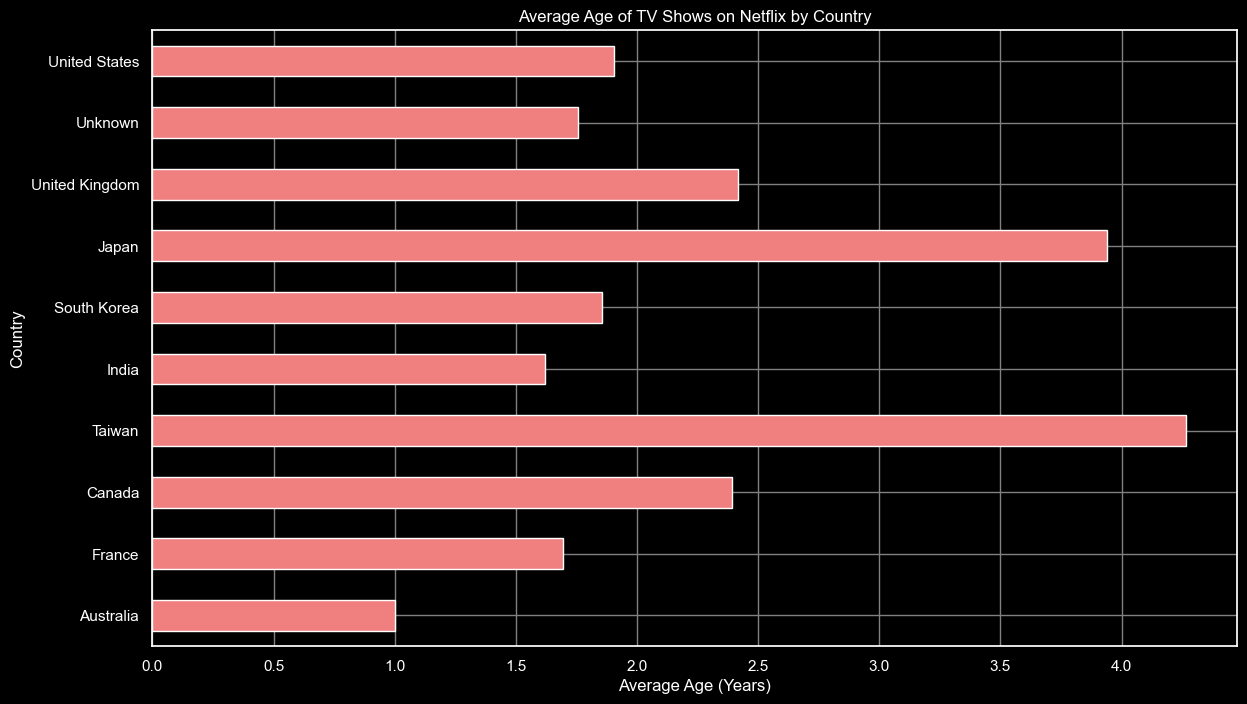

In [9]:
# Calculate the average age of TV shows by country
average_age_tv_shows = df[df['type'] == 'TV Show'].groupby('country')['age'].mean().sort_values(ascending=False)

# Select top 10 countries with the most TV shows for better visualization
top_countries_tv_shows = df[df['type'] == 'TV Show']['country'].value_counts().head(10).index
average_age_tv_shows_top_countries = average_age_tv_shows[top_countries_tv_shows]

# Plotting average age by country
plt.figure(figsize=(14, 8))
average_age_tv_shows_top_countries.plot(kind='barh', color='lightcoral')
plt.title('Average Age of TV Shows on Netflix by Country')
plt.xlabel('Average Age (Years)')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the highest value at the top
plt.show()


Distribution of content ratings:
TV-MA    3208
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64


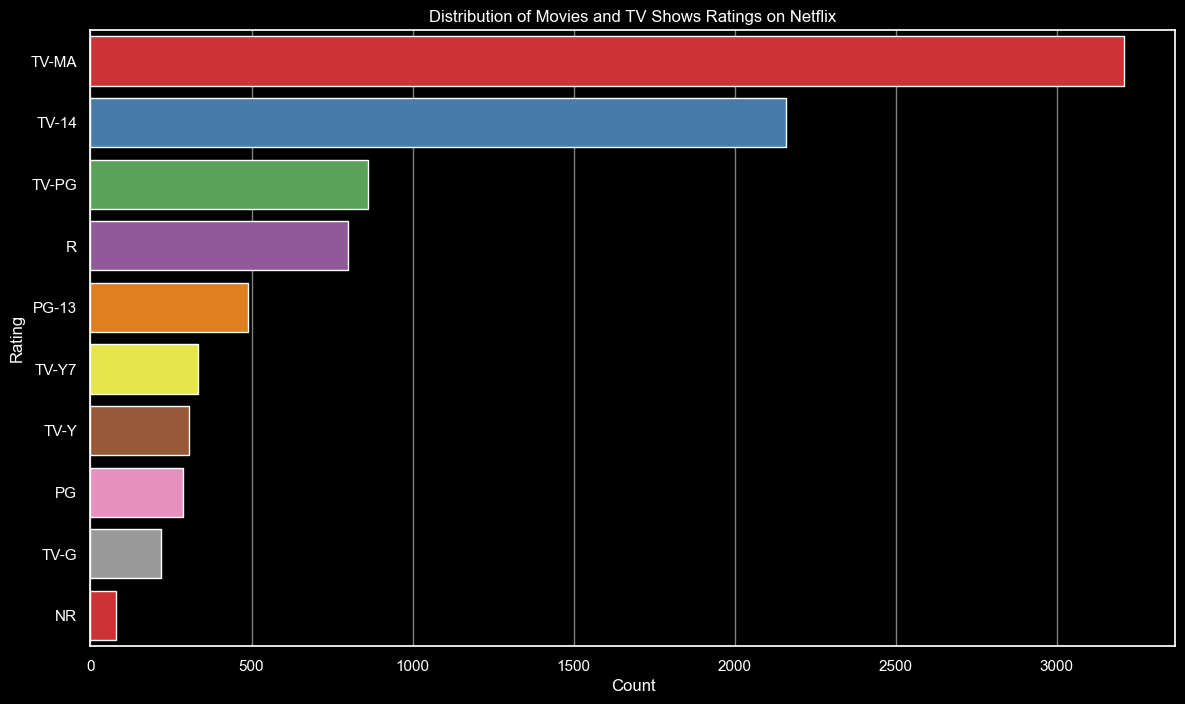

In [10]:
# Distribution of ratings
rating_distribution = df['rating'].value_counts().head(10)
print("Distribution of content ratings:")
print(rating_distribution)

# Plotting the distribution
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='rating', order=rating_distribution.index, palette='Set1')
plt.title('Distribution of Movies and TV Shows Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


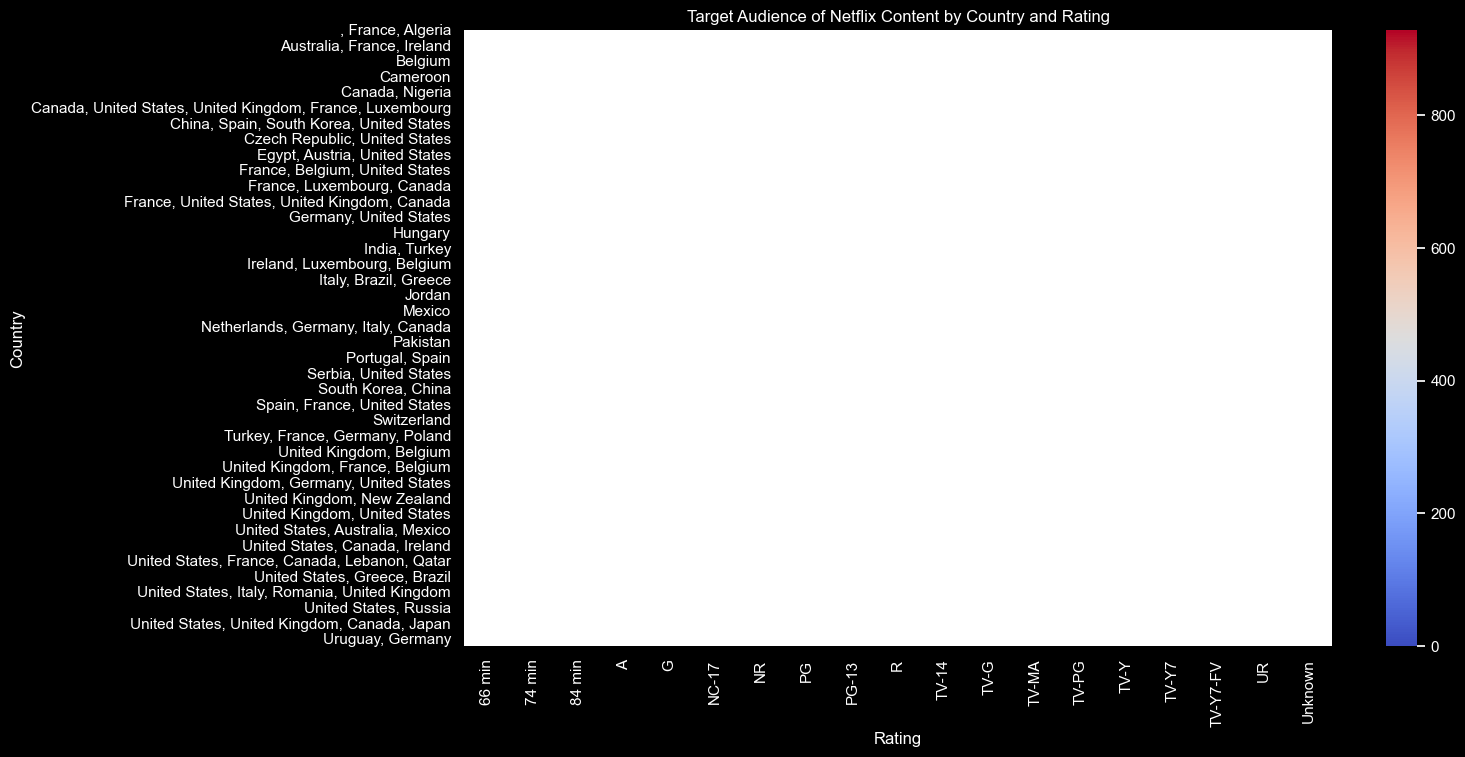

In [11]:
# Target audience
target_audience = df.groupby(['country', 'rating']).size().unstack().fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(target_audience, cmap='coolwarm', linewidths=0.5)
plt.title('Target Audience of Netflix Content by Country and Rating')
plt.xlabel('Rating')
plt.ylabel('Country')
plt.show()


Top 10 genres:
[('International Movies', 2752), ('Dramas', 2427), ('Comedies', 1674), ('International TV Shows', 1351), ('Documentaries', 869), ('Action & Adventure', 859), ('TV Dramas', 763), ('Independent Movies', 756), ('Children & Family Movies', 641), ('Romantic Movies', 616)]


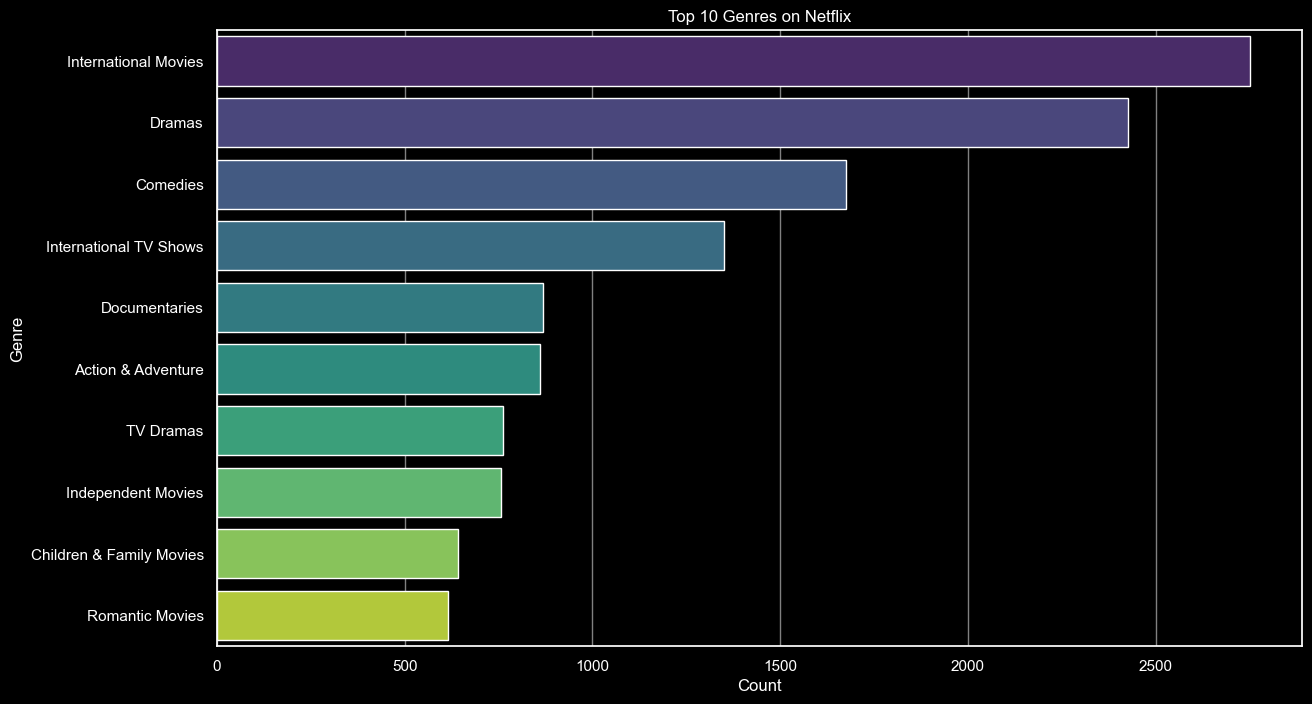

In [12]:
from collections import Counter

# Split genres and count occurrences
genres = df['listed_in'].str.split(', ')
genre_counts = Counter([genre for sublist in genres for genre in sublist])
common_genres = genre_counts.most_common(10)
print("Top 10 genres:")
print(common_genres)

# Plotting the top 10 genres
genre_df = pd.DataFrame(common_genres, columns=['Genre', 'Count'])
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


Average Movie Duration: 99.53 minutes
Average TV Show Seasons: 1.76 seasons


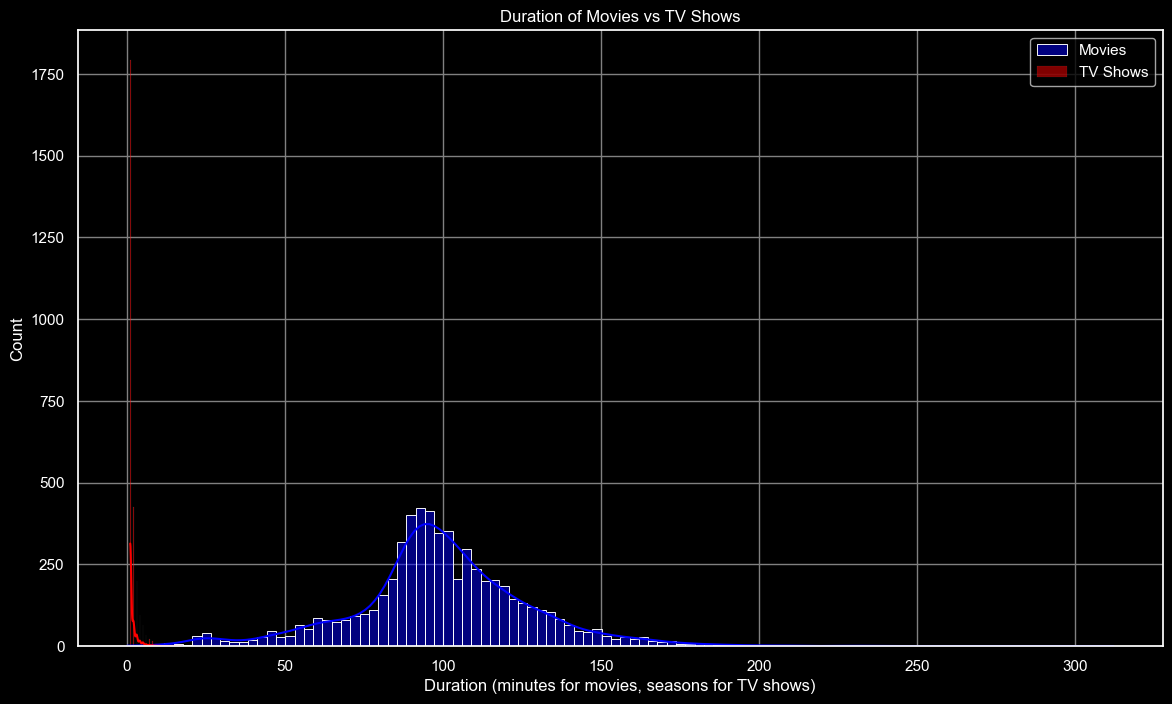

In [13]:
# Average duration
movies_duration = df[df['type'] == 'Movie']['duration']
tv_shows_seasons = df[df['type'] == 'TV Show']['duration']

average_movie_duration = movies_duration.mean()
average_tv_show_seasons = tv_shows_seasons.mean()

print(f"Average Movie Duration: {average_movie_duration:.2f} minutes")
print(f"Average TV Show Seasons: {average_tv_show_seasons:.2f} seasons")

# Plotting duration comparison
plt.figure(figsize=(14, 8))
sns.histplot(movies_duration, color='blue', kde=True, label='Movies')
sns.histplot(tv_shows_seasons, color='red', kde=True, label='TV Shows')
plt.title('Duration of Movies vs TV Shows')
plt.xlabel('Duration (minutes for movies, seasons for TV shows)')
plt.ylabel('Count')
plt.legend()
plt.show()


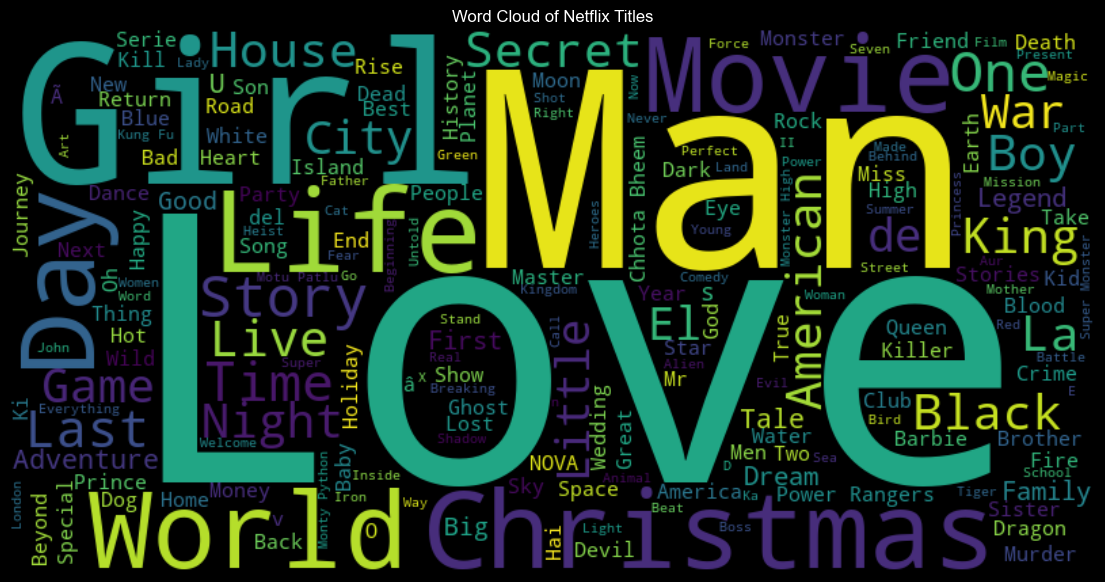

In [14]:
from wordcloud import WordCloud

# Word cloud for titles
title_words = ' '.join(df['title'].dropna())
wordcloud_titles = WordCloud(width=800, height=400, background_color='black').generate(title_words)

# Plotting the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()


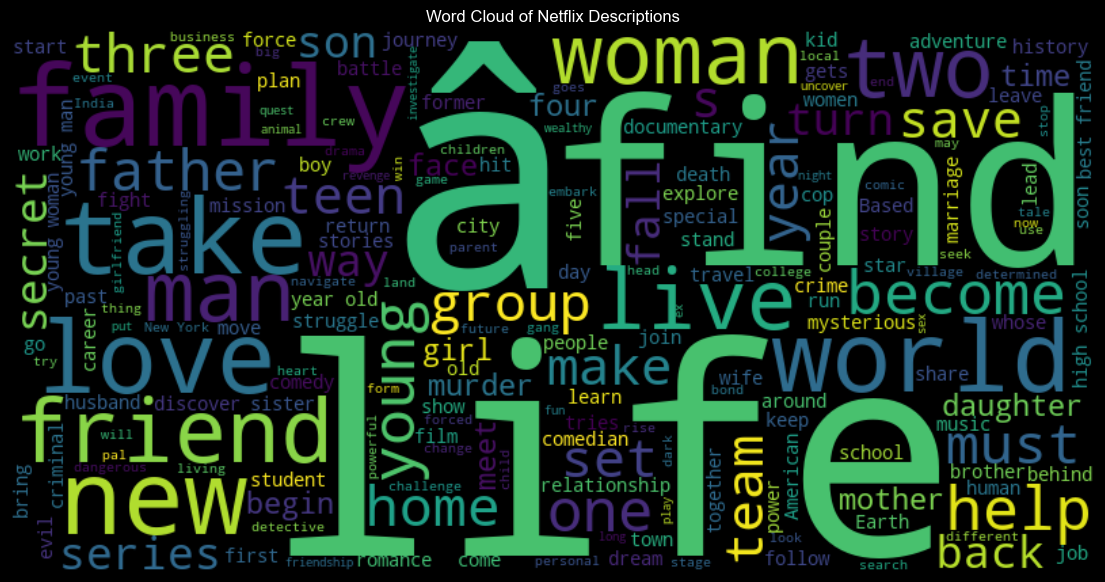

In [15]:
# Word cloud for descriptions
description_words = ' '.join(df['description'].dropna())
wordcloud_descriptions = WordCloud(width=800, height=400, background_color='black').generate(description_words)

# Plotting the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud_descriptions, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Descriptions')
plt.show()
